In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import decimal
import sys
import sklearn
from sklearn.utils import shuffle
from sklearn import linear_model
%matplotlib inline

In [2]:
data=[{'gameDataId':4,'duration':120},{'gameDataId':2,'duration':120}]
maxLevel=10

In [3]:
# Inladen van de data
df =pd.read_csv('games.csv')
df.sort_values('gameDataId', axis=0, ascending=True,inplace=True)

df.head()


,gameDataId,timeBetween,percentSpeed,timePlayed,tries,isCorrect,level,gameId,id,activateDate,endDate,finishDate,isActive,letter,date,activateDateFormat,endDateFormat,finishDateFormat,gameDuration
0,2,20,1,20,0,False,5,1,1,1484317625938,1484317645938,1484317645938,True,NaN,NaN,2017-01-13T14:27:05+00:00,2017-01-13T14:27:25+00:00,2017-01-13T14:27:25+00:00,176
12,2,20,1,20,0,False,5,3,1,1484317625938,1484317645938,1484317645938,True,NaN,NaN,2017-01-13T14:27:05+00:00,2017-01-13T14:27:25+00:00,2017-01-13T14:27:25+00:00,120
6,2,20,1,20,0,False,5,2,1,1484317625938,1484317645938,1484317645938,True,NaN,NaN,2017-01-13T14:27:05+00:00,2017-01-13T14:27:25+00:00,2017-01-13T14:27:25+00:00,120
15,4,36,1,36,0,False,2,3,4,1484317705938,1484317741938,1484317741938,True,NaN,1.484318e+12,2017-01-13T14:28:25+00:00,2017-01-13T14:29:01+00:00,2017-01-13T14:29:01+00:00,120
14,4,26,1,26,0,False,3,3,3,1484317675938,1484317701938,1484317701938,True,NaN,1.484318e+12,2017-01-13T14:27:55+00:00,2017-01-13T14:28:21+00:00,2017-01-13T14:28:21+00:00,120


In [4]:
#df=df.drop(df.columns[[1,2,5,7,8,9,10,11,12,13,14,15,16]], axis=1)
sequence = ['gameDataId','gameDuration','level']
df = df.reindex(columns=sequence)
df.head()

,gameDataId,gameDuration,level
0,2,176,5
12,2,120,5
6,2,120,5
15,4,120,2
14,4,120,3


In [5]:
df.corr()

,gameDataId,gameDuration,level
gameDataId,1.000000e+00,-2.397856e-17,-6.573757e-01
gameDuration,-2.397856e-17,1.000000e+00,1.003095e-17
level,-6.573757e-01,1.003095e-17,1.000000e+00


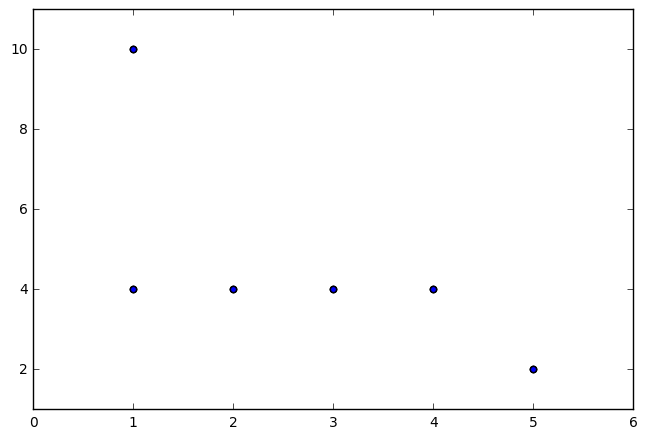

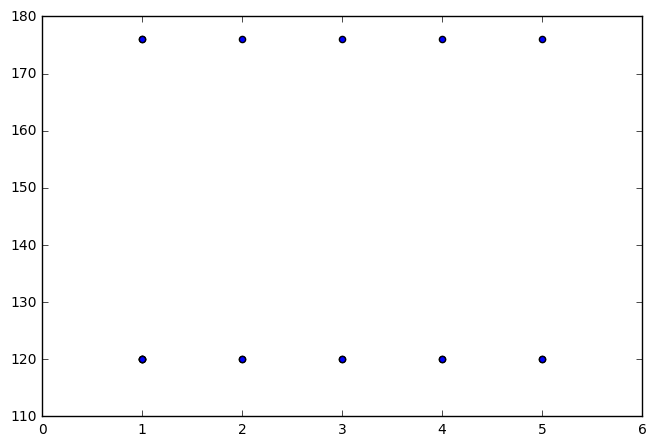

In [6]:
fig2=plt.figure();
ax1=fig2.add_axes([0,0,1,1])
ax1.scatter(df.level, df.gameDataId)

fig1=plt.figure();
ax1=fig1.add_axes([0,0,1,1])
ax1.scatter(df.level, df.gameDuration)

In [7]:
#randomiseer en eerste 100 als testset gebruiken:

dfrnd = shuffle(df,random_state=0)
#dfTrain = dataset[0:1000]
#dfTest = dataset[1000:]

#dataset opsplitsen
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import ShuffleSplit

features = dfrnd.ix[:,[0,1]].copy() #o tot en met 3
targets = dfrnd.ix[:,[2]].copy() # 4

X_train, X_test, Y_train, Y_test = train_test_split(features, targets, test_size=0.4, random_state=0)

#training en validatie

regr_ep = linear_model.LinearRegression()
regr_ep.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
score=regr_ep.score(X_test, Y_test) #--> vrij dicht bij 1 -> vrij goede correlatie
print(score)

0.134344023324


In [9]:
val=[]
if len(data)>0:
    for x in data:
        if x['duration'] is not None and x['gameDataId'] is not None:
            item=regr_ep.predict([[x['gameDataId'],x['duration']]])
            if item<=maxLevel and item>0:
                rounded= math.ceil(item[0][0]*100)/100
                x['level']=int(rounded)
                print(x)

                val.append(x)
            else:
                print(item,'not ')



{'gameDataId': 4, 'level': 3, 'duration': 120}
{'gameDataId': 2, 'level': 4, 'duration': 120}


In [10]:
print(val)
obj={}
obj['data']=val
obj['score']=score

[{'gameDataId': 4, 'level': 3, 'duration': 120}, {'gameDataId': 2, 'level': 4, 'duration': 120}]
